# Predicting graduation rates group project

In this group project, you'll be predicting graduation rates (or, more specifically, the percent difference from the mean graduation rate) for high school students in different areas of the country.

As you may already know, [your illustrious instructor Dave Yerrington won a competition on this dataset.](http://devpost.com/software/sriozidave_datafordiploma)

---

### Dataset

The files for this project can be found in the `/DSI-SF-2/datasets/data_for_diplomas/` folder. The contents are:

    grad_train: the training data you will be building models on
    graduation_with_census_schema.pdf: the "codebook" for the grad_train.csv columns
    school_county_spending.csv: data on the spending of different schools
    school_county_spending_info.pdf: information about the spending data csv
    climate_data/: a folder that has climate data for every state for 2011 and 2012. There are csvs for precipitation and average temperature
    
This isn't all the data Dave used, but it's a decent amount of it. You're not expected to use _all_ of this data. After all, you don't have that long to build these models, but it's there if you want to.

**Target variable:**

In the spreadsheet there is a variable called `grad_pct_from_mean`. This is the difference in percent graduated for that school from the mean graduation rate across the country. In other words, it is:

    (schools graduation rate / (mean of all schools graduation rate) - 1.) * 100.
    
I changed this from the original rate column because, as you know, regression is not appropriate for prediction of rates since they are guaranteed to fall between 0 and 1.

**Do not include variables in the model that contain the same information as the target variable!** 

---

### Structure of the project

You will, in groups, try to build a model that predicts this `grad_pct_from_mean` variable using the information you have. 

**This project is also an excercise in using your time wisely.** You don't have that much time, so keep the scope of your process simple rather than complex. This will likely mean _not_ considering every variable available to you.

**I have left out 25% of the data as a testing set. At the end, groups will come up and get to test their model on the testing set.**

Since you will likely be cleaning the data, you will need to be able to run the testing code through the same cleaning and munging process as the training data. I recommend writing some functions that make this process faster/easier!

Good luck!

In [921]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [922]:
grad_train = pd.read_csv('/Users/alex/Desktop/DSI-SF-2-akodate/datasets/data_for_diplomas/grad_train.csv')
spending = pd.read_csv('/Users/alex/Desktop/DSI-SF-2-akodate/datasets/data_for_diplomas/school_county_spending.csv')
climate = pd.read_csv('/Users/alex/Desktop/DSI-SF-2-akodate/datasets/data_for_diplomas/combined_climate_data.csv')

print grad_train.shape
print spending.shape
print climate.shape

(7338, 580)
(14482, 66)
(50, 5)


In [923]:
pd.options.display.max_rows = 600

In [924]:
def merge_df(spending):
    spending = spending[spending.NCESID.apply(lambda x: x.isdigit())]
    spending.NCESID = spending.NCESID.map(lambda x: int(x))
    return spending
    
spending_mergeable = merge_df(spending)

In [925]:
# spending_mergeable.head(2)

In [926]:
climate = climate.drop('Unnamed: 0', axis=1)

In [927]:
df_merged = grad_train.merge(spending_mergeable, left_on='leaid11', right_on='NCESID')
df_merged = df_merged.merge(climate, left_on='State_name', right_on='state_y')

In [953]:
df_merged.head().T

,0,1,2,3,4
leaid11,1808340,1810140,1806900,1807680,1802430
STNAM,INDIANA,INDIANA,INDIANA,INDIANA,INDIANA
FIPST,18,18,18,18,18
leanm11,Oak Hill United School Corp,Shelbyville Central Schools,Mitchell Community Schools,North Adams Community Schools,Covington Community Sch Corp
ALL_COHORT_1112,115,273,129,171,57
ALL_RATE_1112,92,89,87,92,90
MAM_COHORT_1112,1,1,NaN,1,NaN
MAM_RATE_1112,PS,PS,NaN,PS,NaN
MAS_COHORT_1112,NaN,NaN,NaN,NaN,1
MAS_RATE_1112,NaN,NaN,NaN,NaN,PS


In [929]:
# df_merged.isnull().sum()

In [936]:
# Percent not null in each column
percent_not_null = (grad_train.shape[0] - grad_train.isnull().sum()) / 7338.0 * 100
grad_dropped = df_merged.drop(df_merged[percent_not_null[percent_not_null < 99.5].index], axis=1)
# grad_dropped = df_merged.copy()

In [937]:
# grad_dropped.isnull().sum()

In [938]:
grad_dropped.shape

(7297, 387)

In [952]:
grad_dropped.columns = [col_name.lower().replace(' ', '_').replace('.', '_').replace('(', '').replace(')', '').replace('-', '_') for col_name in grad_dropped.columns]
grad_dropped.dtypes

leaid11                              int64
stnam                               object
fipst                                int64
leanm11                             object
all_cohort_1112                      int64
all_rate_1112                      float64
percentage                         float64
state                                int64
county                               int64
tract_code                           int64
school_district                     object
district_id                          int64
gidtr                                int64
state_1                              int64
state_name                          object
county_1                             int64
county_name                         object
tract                                int64
num_bgs_in_tract                     int64
land_area                          float64
aian_land                            int64
urbanized_area_pop_cen_2010          int64
urban_cluster_pop_cen_2010           int64
rural_pop_c

In [956]:
import patsy
df = grad_dropped.copy()

all_columns = "" + " + ".join(df.columns.difference([
            'all_rate_1112', 
            'percentage', 
            'grad_pct_from_mean', 
            'tract', 
            'tract_code', 
            'leaid11', 
            'stnam', 
            'leanm11', 
            'ncesid',
            'district_id',
            'school_district', 
            'county_name', 
            'name',
            'conum',
            'csa',
            'cbsa',
            'state_name',
            'state_y',
            'state_1',
            'county_1',
            'idcensus',
            'county',
            'gidtr']))


# all_columns = "" + " + ".join(['pct_prs_blw_pov_lev_acs_08_12','pct_not_mrdcple_hhd_acs_08_12', 'pct_not_mrdcple_hhd_cen_2010','ecd_rate_1112', 'ppsalwg', 'ppisalwg'])
# all_columns = "" + " + ".join(['pct_prs_blw_pov_lev_acs_08_12','pct_not_mrdcple_hhd_acs_08_12', 'pct_not_mrdcple_hhd_cen_2010', 'ppsalwg', 'ppisalwg'])
# all_columns = "" + " + ".join(['pct_prs_blw_pov_lev_acs_08_12','pct_not_mrdcple_hhd_acs_08_12','ecd_rate_1112'])
# all_columns = "" + " + ".join(['pct_prs_blw_pov_lev_acs_08_12','pct_not_mrdcple_hhd_acs_08_12'])
# all_columns = "" + " + ".join(['ppsalwg', 'ppisalwg'])
formula = "grad_pct_from_mean ~ " + all_columns + " - 1"
print formula

y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')
print X.shape
print y.shape

grad_pct_from_mean ~ age5p_african_acs_08_12 + age5p_african_acsmoe_08_12 + age5p_arabic_acs_08_12 + age5p_arabic_acsmoe_08_12 + age5p_armenian_acs_08_12 + age5p_armenian_acsmoe_08_12 + age5p_cambodian_acs_08_12 + age5p_cambodian_acsmoe_08_12 + age5p_chinese_acs_08_12 + age5p_chinese_acsmoe_08_12 + age5p_frcreole_acs_08_12 + age5p_frcreole_acsmoe_08_12 + age5p_french_acs_08_12 + age5p_french_acsmoe_08_12 + age5p_german_acs_08_12 + age5p_german_acsmoe_08_12 + age5p_greek_acs_08_12 + age5p_greek_acsmoe_08_12 + age5p_gujarati_acs_08_12 + age5p_gujarati_acsmoe_08_12 + age5p_hebrew_acs_08_12 + age5p_hebrew_acsmoe_08_12 + age5p_hindi_acs_08_12 + age5p_hindi_acsmoe_08_12 + age5p_hmong_acs_08_12 + age5p_hmong_acsmoe_08_12 + age5p_hungarian_acs_08_12 + age5p_hungarian_acsmoe_08_12 + age5p_italian_acs_08_12 + age5p_italian_acsmoe_08_12 + age5p_japanese_acs_08_12 + age5p_japanese_acsmoe_08_12 + age5p_korean_acs_08_12 + age5p_korean_acsmoe_08_12 + age5p_laotian_acs_08_12 + age5p_laotian_acsmoe_08_

In [957]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

y = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(5778, 364) (5778,)
(1445, 364) (1445,)


In [958]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

Xn_train = ss.fit_transform(X_train)
Xn_test = ss.fit_transform(X_test)

In [959]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

optimal_elastic = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], n_alphas=500, cv=5, verbose=1, n_jobs=1)
model = optimal_elastic.fit(Xn_train, y_train)
# model = ElasticNet(alpha=optimal_elastic.alpha_, l1_ratio=optimal_elastic.l1_ratio_).fit(X_train, y_train)

print "Optimal alpha:", optimal_elastic.alpha_
print "Optimal L1 ratio:", optimal_elastic.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Optimal alpha: 0.157299720881
Optimal L1 ratio: 0.9


[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  2.2min finished


Model Score: 0.366285405297


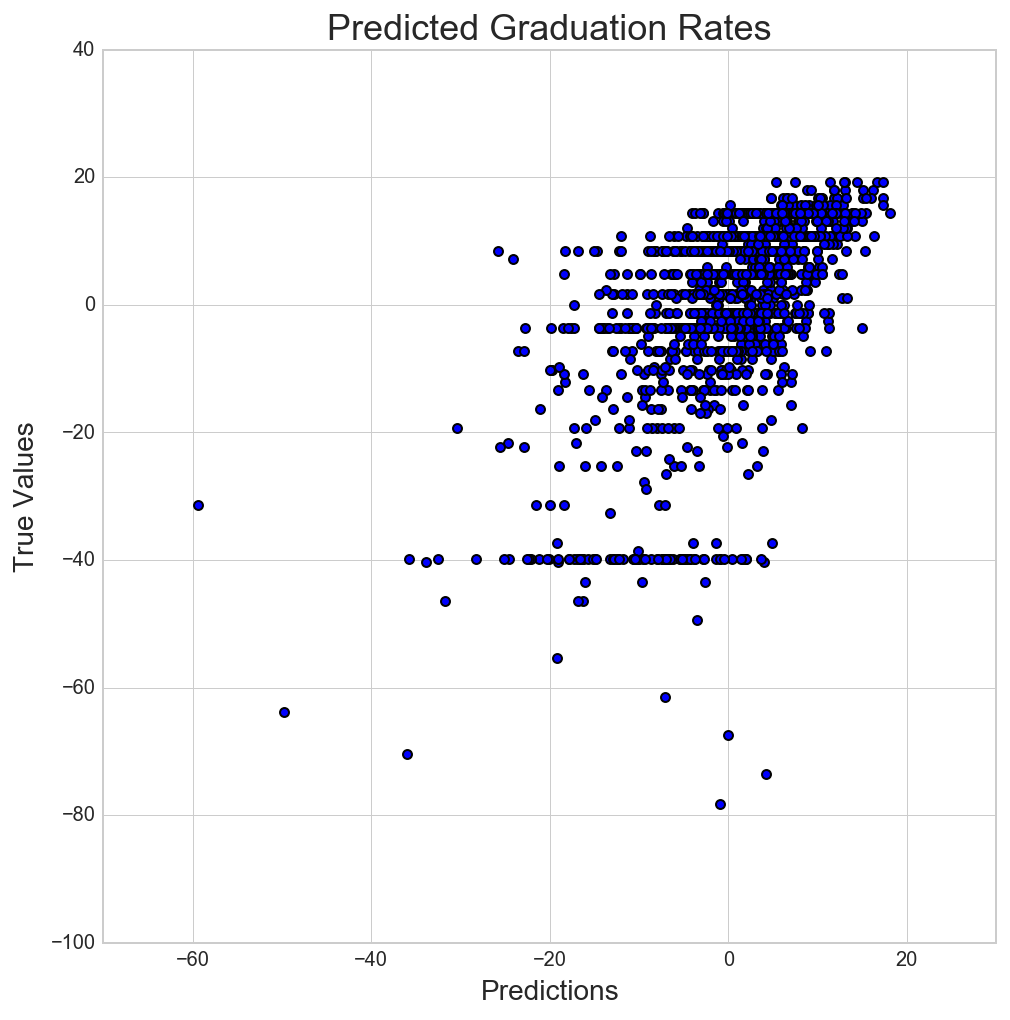

In [960]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[8,8])

plt.xlabel('Predictions', fontsize=14)
plt.ylabel('True Values', fontsize=14)
plt.title("Predicted Graduation Rates", fontsize=18)

predictions = model.predict(Xn_test)
score = model.score(Xn_test, y_test)

plt.scatter(predictions, y_test)
print 'Model Score:', score

In [961]:
pd.DataFrame(zip(model.coef_, X.columns)).sort_values(0)

,0,1
287,-4.924833,ppsgenad
246,-1.838870,pctfcomp
241,-1.484983,pct_pop_under_5_cen_2010
161,-1.230077,land_area
327,-1.075745,tcurspup
193,-0.865981,nh_blk_alone_acsmoe_08_12
181,-0.673600,mobile_homes_acs_08_12
231,-0.672045,pct_nh_blk_alone_cen_2010
281,-0.617291,ppcstot
317,-0.573997,strspec


.


.


.


.


.


.


.


.


.


.


.


.

In [962]:
grad_test = pd.read_csv('/Users/alex/Desktop/DSI-SF-2-akodate/datasets/data_for_diplomas/grad_test.csv')

In [965]:
df_merged = grad_test.merge(spending_mergeable, how='left', left_on='leaid11', right_on='NCESID')
df_merged = df_merged.merge(climate, how='left', left_on='State_name', right_on='state_y')
df_merged.shape

(2447, 650)

In [966]:
# df_merged.tail().T

In [967]:
# df_merged.isnull().sum()

In [968]:
# Percent not null in each column
# percent_not_null = (grad_test.shape[0] - grad_test.isnull().sum()) / float(grad_test.shape[0]) * 100
# grad_dropped = df_merged.drop(df_merged[percent_not_null[percent_not_null < 99].index], axis=1)
grad_dropped = df_merged.copy()

In [970]:
grad_dropped.shape

(2447, 650)

In [971]:
grad_dropped.columns = [col_name.lower().replace(' ', '_').replace('.', '_').replace('(', '').replace(')', '').replace('-', '_') for col_name in grad_dropped.columns]
# grad_dropped.dtypes

In [972]:
import patsy
df = grad_dropped.copy()


# all_columns = "" + " + ".join(df.columns.difference([
#             'all_rate_1112', 
#             'percentage', 
#             'grad_pct_from_mean', 
#             'tract', 
#             'tract_code', 
#             'leaid11', 
#             'stnam', 
#             'leanm11', 
#             'school_district', 
#             'county_name', 
#             'name',
#             'conum',
#             'csa',
#             'cbsa',
#             'state_y',
#             'gidtr']))


# all_columns = "" + " + ".join(df.columns[:400].difference(['all_rate_1112', 'percentage', 'grad_pct_from_mean', 'tract', 'tract_code', 'leaid11', 'stnam', 'leanm11', 'school_district', 'county_name', 'gidtr']))
# all_columns = "" + " + ".join(df.columns[:450].difference(['all_rate_1112', 'grad_pct_from_mean', 'tract', 'tract_code', 'leaid11', 'stnam', 'leanm11', 'school_district', 'county_name', 'gidtr']))
# all_columns = "" + " + ".join(['pct_prs_blw_pov_lev_acs_08_12','pct_not_mrdcple_hhd_acs_08_12', 'pct_not_mrdcple_hhd_cen_2010','ecd_rate_1112', 'ppsalwg', 'ppisalwg'])
# all_columns = "" + " + ".join(['pct_prs_blw_pov_lev_acs_08_12','pct_not_mrdcple_hhd_acs_08_12', 'pct_not_mrdcple_hhd_cen_2010', 'ppsalwg', 'ppisalwg'])
# all_columns = "" + " + ".join(['pct_prs_blw_pov_lev_acs_08_12','pct_not_mrdcple_hhd_acs_08_12','ecd_rate_1112'])
# all_columns = "" + " + ".join(['pct_prs_blw_pov_lev_acs_08_12','pct_not_mrdcple_hhd_acs_08_12'])
# all_columns = "" + " + ".join(['ppsalwg', 'ppisalwg'])
formula = "grad_pct_from_mean ~ " + all_columns + " - 1"
print formula

y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')
print X.shape
print y.shape

grad_pct_from_mean ~ age5p_african_acs_08_12 + age5p_african_acsmoe_08_12 + age5p_arabic_acs_08_12 + age5p_arabic_acsmoe_08_12 + age5p_armenian_acs_08_12 + age5p_armenian_acsmoe_08_12 + age5p_cambodian_acs_08_12 + age5p_cambodian_acsmoe_08_12 + age5p_chinese_acs_08_12 + age5p_chinese_acsmoe_08_12 + age5p_frcreole_acs_08_12 + age5p_frcreole_acsmoe_08_12 + age5p_french_acs_08_12 + age5p_french_acsmoe_08_12 + age5p_german_acs_08_12 + age5p_german_acsmoe_08_12 + age5p_greek_acs_08_12 + age5p_greek_acsmoe_08_12 + age5p_gujarati_acs_08_12 + age5p_gujarati_acsmoe_08_12 + age5p_hebrew_acs_08_12 + age5p_hebrew_acsmoe_08_12 + age5p_hindi_acs_08_12 + age5p_hindi_acsmoe_08_12 + age5p_hmong_acs_08_12 + age5p_hmong_acsmoe_08_12 + age5p_hungarian_acs_08_12 + age5p_hungarian_acsmoe_08_12 + age5p_italian_acs_08_12 + age5p_italian_acsmoe_08_12 + age5p_japanese_acs_08_12 + age5p_japanese_acsmoe_08_12 + age5p_korean_acs_08_12 + age5p_korean_acsmoe_08_12 + age5p_laotian_acs_08_12 + age5p_laotian_acsmoe_08_

In [973]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

y = np.ravel(y)
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

#print X_train.shape, y_train.shape
#print X_test.shape, y_test.shape

In [974]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

optimal_elastic = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], n_alphas=500, cv=5, verbose=1, n_jobs=1)
model = optimal_elastic.fit(X_train, y_train)
# model = ElasticNet(alpha=optimal_elastic.alpha_, l1_ratio=optimal_elastic.l1_ratio_).fit(X_train, y_train)

print "Optimal alpha:", optimal_elastic.alpha_
print "Optimal L1 ratio:", optimal_elastic.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Optimal alpha: 113.232276182
Optimal L1 ratio: 1.0


In [982]:
optimal_elastic.score(X, y)

0.27852972751250493

Model Score: 0.278529727513


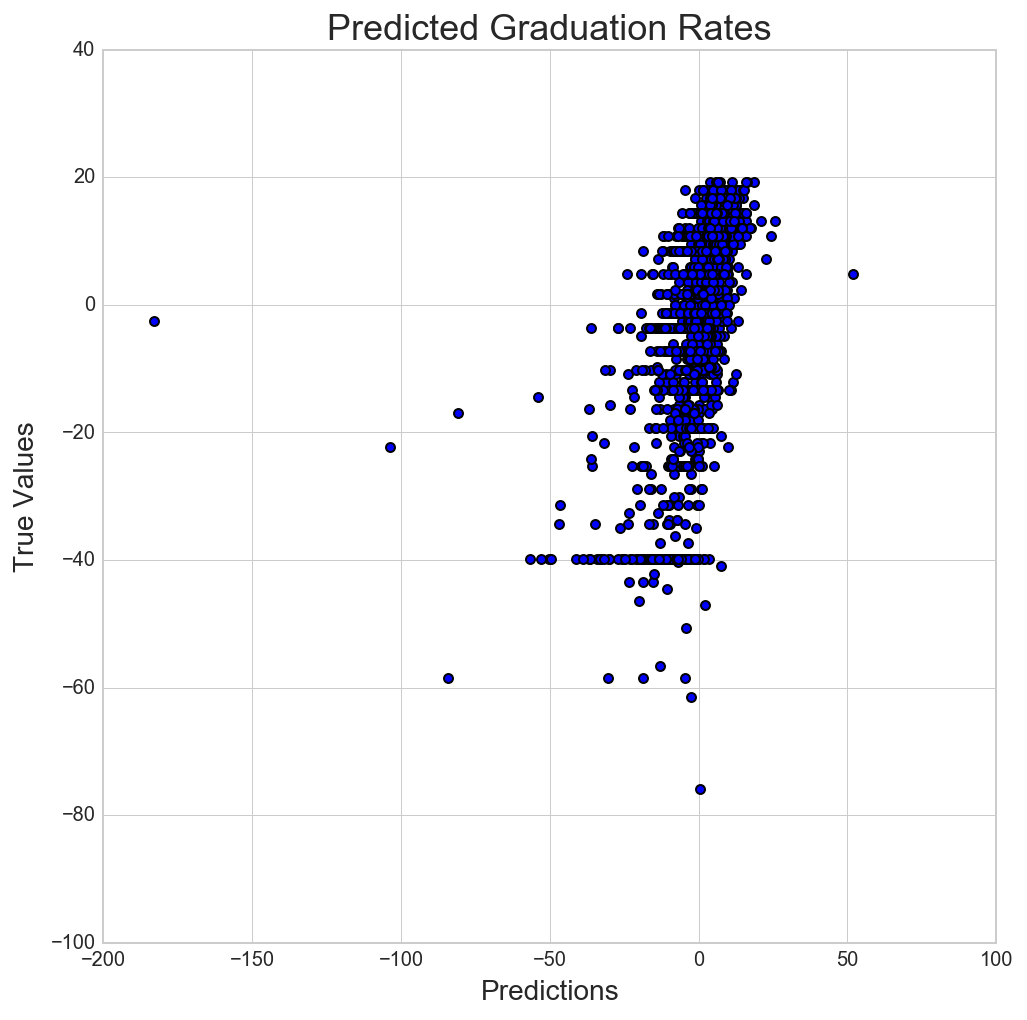

In [980]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[8,8])

plt.xlabel('Predictions', fontsize=14)
plt.ylabel('True Values', fontsize=14)
plt.title("Predicted Graduation Rates", fontsize=18)

predictions = model.predict(X)
score = model.score(X, y)

plt.scatter(predictions, y)
print 'Model Score:', score